<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-&amp;-interpret-dataset" data-toc-modified-id="Read-&amp;-interpret-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read &amp; interpret dataset</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Moving-average/VWAP" data-toc-modified-id="Moving-average/VWAP-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Moving average/VWAP</a></span></li><li><span><a href="#Lag-features-(Avoiding-data-leakage)" data-toc-modified-id="Lag-features-(Avoiding-data-leakage)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Lag-features (Avoiding data leakage)</a></span></li><li><span><a href="#Standardise-(log-transformation)" data-toc-modified-id="Standardise-(log-transformation)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Standardise (log-transformation)</a></span></li></ul></li><li><span><a href="#EDA-(for-all_data)" data-toc-modified-id="EDA-(for-all_data)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA (for all_data)</a></span><ul class="toc-item"><li><span><a href="#Check-the-correlation-of-features-with-the-target" data-toc-modified-id="Check-the-correlation-of-features-with-the-target-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Check the correlation of features with the target</a></span></li></ul></li><li><span><a href="#Model-training-and-evaluation" data-toc-modified-id="Model-training-and-evaluation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model training and evaluation</a></span><ul class="toc-item"><li><span><a href="#Preparation" data-toc-modified-id="Preparation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Preparation</a></span></li><li><span><a href="#Linear-model" data-toc-modified-id="Linear-model-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Linear model</a></span><ul class="toc-item"><li><span><a href="#Linear-regression" data-toc-modified-id="Linear-regression-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Linear regression</a></span></li><li><span><a href="#Ridge" data-toc-modified-id="Ridge-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Ridge</a></span></li><li><span><a href="#Lasso" data-toc-modified-id="Lasso-4.2.3"><span class="toc-item-num">4.2.3&nbsp;&nbsp;</span>Lasso</a></span></li><li><span><a href="#Interpretation-of-the-linear-model" data-toc-modified-id="Interpretation-of-the-linear-model-4.2.4"><span class="toc-item-num">4.2.4&nbsp;&nbsp;</span>Interpretation of the linear model</a></span></li></ul></li><li><span><a href="#Non-linear-model" data-toc-modified-id="Non-linear-model-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Non-linear model</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression-with-PolynomialFeatures" data-toc-modified-id="Linear-Regression-with-PolynomialFeatures-4.3.1"><span class="toc-item-num">4.3.1&nbsp;&nbsp;</span>Linear Regression with PolynomialFeatures</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-4.3.2"><span class="toc-item-num">4.3.2&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#RandomForest-※-Skip-for-the-same-reason-as-polynomial-model" data-toc-modified-id="RandomForest-※-Skip-for-the-same-reason-as-polynomial-model-4.3.3"><span class="toc-item-num">4.3.3&nbsp;&nbsp;</span>RandomForest ※ Skip for the same reason as polynomial model</a></span></li></ul></li><li><span><a href="#Statistical-model" data-toc-modified-id="Statistical-model-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Statistical model</a></span><ul class="toc-item"><li><span><a href="#ARIMAX-model" data-toc-modified-id="ARIMAX-model-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>ARIMAX model</a></span></li><li><span><a href="#SARIMAX-model" data-toc-modified-id="SARIMAX-model-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>SARIMAX model</a></span></li></ul></li><li><span><a href="#Others--->-Facebook-Prophet" data-toc-modified-id="Others--->-Facebook-Prophet-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Others --&gt; Facebook Prophet</a></span></li></ul></li><li><span><a href="#Visualisation-of-the-model-performance" data-toc-modified-id="Visualisation-of-the-model-performance-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Visualisation of the model performance</a></span></li><li><span><a href="#Making-combined-price-data-for-the-Phase-2" data-toc-modified-id="Making-combined-price-data-for-the-Phase-2-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Making combined price data for the Phase 2</a></span></li></ul></div>

# Read & interpret dataset

- Loading some datasets <p>
- Preprocessing missing values and outliers on the datasets

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import pathlib
import glob
import math
import statsmodels.api as sm
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import datetime

# Show all the rows and columns up to 200
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [2]:
all_data = pd.read_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/all_data.csv', sep=',', header=0)

In [3]:
all_data.head()

,Date,HH,Open,High,Low,Close,Average,Volume(MWh/h),Volume(Tick count),Time,System_price(Yen/kWh),Price_Hokkaido(Yen/kWh),Price_Tokyo(Yen/kWh),Price_Kansai(Yen/kWh),BidExceed_diff,HourlyDemand_Hokkaido,HourlyDemand_Tokyo,HourlyDemand_Kansai,HourlyDemand_Okinawa,Wind_TOH,Geothermal_TOH,PumpedStorage_TOH,Interconnection_TOH,Geothermal_HOK,Wind_HOK,Interconnection_HOK,Wind_TKO,Interconnection_TKO,Wind_CHB,Interconnection_CHB,Wind_HKU,PumpedStorage_HKU,Interconnection_HKU,Nuclear_KAN,Wind_KAN,Interconnection_KAN,Thermal_CHG,Water_CHG,Wind_CHG,Interconnection_CHG,Nuclear_SHI,Wind_SHI,Interconnection_SHI,Nuclear_KYU,Geothermal_KYU,PV_KYU,PVCurtailment_KYU,Wind_KYU,WindCurtailment_KYU,Interconnection_KYU,Thermal_OKI,Biomass_OKI,Wind_OKI,Allarea_TotalDemand,Allarea_Water,Allarea_Thermal,Allarea_Geothermal,Allarea_Biomass,Allarea_PumpedStorage,Allarea_Interconnection,Water_Ratio,Thermal_Ratio,Geothermal_Ratio,Planned_Min_flag,Planned_Max_flag,month,dayofweek,holiday
0,2016-04-01,1,7.69,7.69,7.69,7.69,7.69,0.70,1,00:00:00,6.61,8.66,6.69,6.69,0,3166.0,25547.0,12917.964,644.70,46.0,116.0,0.0,-2200.0,13.0,40.0,42.0,2.0,201.0,21.0,-331.0,12.0,0.0,-148.0,0.0,41.0,1625.0,0.0,0.0,0.0,0.0,0.0,5.0,-71.0,1782.0,145.0,0.0,0.0,44.0,0.0,-1300.0,643.0,2.0,2.0,50178.0,4897.0,45004.0,274.0,82.0,110.0,-2182.0,0.100,0.9,0.01,0.0,0.0,4,4,0
1,2016-04-01,2,7.45,7.45,7.45,7.45,7.45,0.75,0,00:30:00,6.34,8.66,6.34,6.34,0,3224.0,24940.5,12876.666,635.30,48.0,116.0,0.0,-2189.0,13.0,37.0,51.5,2.0,193.5,24.5,-403.5,10.5,0.0,-79.0,0.0,32.5,1701.5,0.0,0.0,0.0,0.0,0.0,5.0,-71.0,1782.0,145.0,0.0,0.0,39.5,0.0,-1298.0,634.0,2.0,2.5,50323.5,4821.0,45204.0,274.0,81.5,55.0,-2094.0,0.095,0.9,0.01,0.0,0.0,4,4,0
2,2016-04-01,3,7.21,7.21,7.21,7.21,7.21,0.80,1,01:00:00,6.34,7.20,6.34,6.34,0,3282.0,24334.0,12835.368,625.90,50.0,116.0,0.0,-2178.0,13.0,34.0,61.0,2.0,186.0,28.0,-476.0,9.0,0.0,-10.0,0.0,24.0,1778.0,0.0,0.0,0.0,0.0,0.0,5.0,-71.0,1782.0,145.0,0.0,0.0,35.0,0.0,-1296.0,625.0,2.0,3.0,50469.0,4745.0,45404.0,274.0,81.0,0.0,-2006.0,0.090,0.9,0.01,0.0,0.0,4,4,0
3,2016-04-01,4,7.06,7.06,7.06,7.06,7.06,0.80,1,01:30:00,6.25,7.10,6.03,6.03,0,3334.5,24134.0,13093.248,632.75,49.0,115.5,0.0,-2174.5,13.0,31.5,60.0,2.0,183.0,35.0,-485.5,8.5,0.0,-38.5,0.0,25.5,1811.0,0.0,0.0,0.0,0.0,0.0,5.0,-69.0,1781.5,145.0,0.0,0.0,39.0,0.0,-1360.0,632.5,2.0,2.5,51340.0,4868.5,46207.0,273.5,80.0,6.0,-2073.5,0.095,0.9,0.01,0.0,0.0,4,4,0
4,2016-04-01,5,7.21,7.21,7.21,7.21,7.21,0.80,1,02:00:00,6.57,7.10,6.57,6.57,0,3387.0,23934.0,13351.128,639.60,48.0,115.0,0.0,-2171.0,13.0,29.0,59.0,2.0,180.0,42.0,-495.0,8.0,0.0,-67.0,0.0,27.0,1844.0,0.0,0.0,0.0,0.0,0.0,5.0,-67.0,1781.0,145.0,0.0,0.0,43.0,0.0,-1424.0,640.0,2.0,2.0,52211.0,4992.0,47010.0,273.0,79.0,12.0,-2141.0,0.100,0.9,0.01,1.0,0.0,4,4,0


# Feature Engineering

## Moving average/VWAP

[Moving average only for System price]

In [4]:
# Moving average for System price (Do not need lag) 1month, 3month, 1year
all_data["Spot_MA25d"] = all_data["System_price(Yen/kWh)"].rolling(1200).mean().round(2)
all_data["Spot_MA75d"] = all_data["System_price(Yen/kWh)"].rolling(3600).mean().round(2)
all_data["Spot_MA200d"] = all_data["System_price(Yen/kWh)"].rolling(9600).mean().round(2)

[VWAP]

(Reference)
MWh/hについて：https://www.jstage.jst.go.jp/article/ieejpes/127/4/127_4_573/_pdf/-char/ja

In [5]:
# Adjust unit from MWh to kWh
all_data['Volume_kWh'] = (all_data['Volume(MWh/h)']/2)*1000
all_data['Cum_Vol'] = all_data['Volume_kWh'].cumsum()
all_data['Cum_Vol_Price'] = (all_data['Volume_kWh'] * all_data['Average'] ).cumsum()
all_data['VWAP'] = all_data['Cum_Vol_Price'] / all_data['Cum_Vol']
all_data = all_data.drop(["Volume_kWh", "Cum_Vol", "Cum_Vol_Price"], axis=1)

In [6]:
all_data = all_data.fillna(0)
all_data.isnull().sum()

Date                       0
HH                         0
Open                       0
High                       0
Low                        0
Close                      0
Average                    0
Volume(MWh/h)              0
Volume(Tick count)         0
Time                       0
System_price(Yen/kWh)      0
Price_Hokkaido(Yen/kWh)    0
Price_Tokyo(Yen/kWh)       0
Price_Kansai(Yen/kWh)      0
BidExceed_diff             0
HourlyDemand_Hokkaido      0
HourlyDemand_Tokyo         0
HourlyDemand_Kansai        0
HourlyDemand_Okinawa       0
Wind_TOH                   0
Geothermal_TOH             0
PumpedStorage_TOH          0
Interconnection_TOH        0
Geothermal_HOK             0
Wind_HOK                   0
Interconnection_HOK        0
Wind_TKO                   0
Interconnection_TKO        0
Wind_CHB                   0
Interconnection_CHB        0
Wind_HKU                   0
PumpedStorage_HKU          0
Interconnection_HKU        0
Nuclear_KAN                0
Wind_KAN      

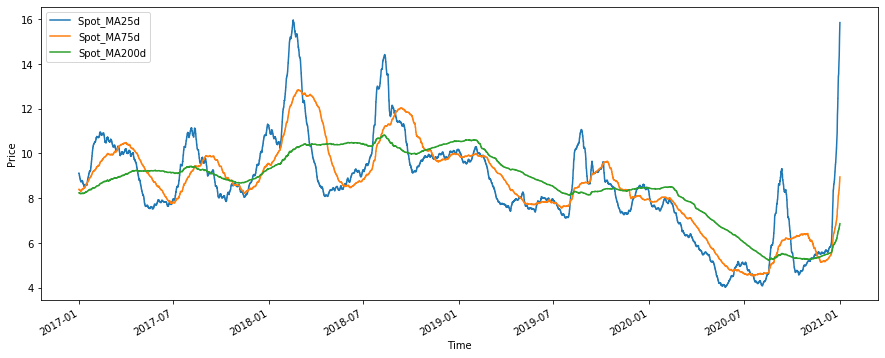

In [7]:
# plot the moving average
fig, ax = plt.subplots(1, figsize=(15, 6))

graph = all_data.copy()
graph["DateTime"] = pd.to_datetime(graph["Date"].astype(str) + " " + graph["Time"].astype(str))

# Set index
graph = graph.set_index("DateTime")
start = "2017-01-01 00:00:00"
end = "2020-12-31 23:30:00"

# Plot Close 
graph.Spot_MA25d [graph.index > start].plot(ax=ax, label="Spot_MA25d ")
graph.Spot_MA75d[graph.index > start].plot(ax=ax, label="Spot_MA75d")
graph.Spot_MA200d[graph.index > start].plot(ax=ax, label="Spot_MA200d")

# x-axis
plt.gcf().autofmt_xdate()
ax.set(xlabel="Time", ylabel="Price")
plt.legend(loc="upper left");

## Lag-features (Avoiding data leakage)

※Infinity value will be happen with Downcast preprocessing. ("Total" column)

In [8]:
# Check the remaining memory on PC
import gc
gc.collect()

37

In [9]:
# This is for generating lag
def generate_lag(train, lag_sizes, cols, lag_sizes_type):

    lag_sizes = np.array(lag_sizes)
    if lag_sizes_type == "HH":
        lag_sizes_adj = lag_sizes * 1 # nothing changes
    elif lag_sizes_type == "Hours":
        lag_sizes_adj = lag_sizes * 2
    elif lag_sizes_type == "Day":
        lag_sizes_adj = lag_sizes * 48

    for ix, lag_sizes_adj_ in enumerate(lag_sizes_adj):
        shifted_df = all_data[cols].shift(lag_sizes_adj_)
        shifted_df.columns = [f"{col_name}_lag_{lag_sizes[ix]}_{lag_sizes_type}" for col_name in shifted_df.columns]
        if ix == 0:
            shifted_df_return = shifted_df
        else:
            shifted_df_return = shifted_df_return.merge(shifted_df, how="left", left_index=True, right_index=True)
    return shifted_df_return

In [10]:
all_data.columns

Index(['Date', 'HH', 'Open', 'High', 'Low', 'Close', 'Average',
       'Volume(MWh/h)', 'Volume(Tick count)', 'Time', 'System_price(Yen/kWh)',
       'Price_Hokkaido(Yen/kWh)', 'Price_Tokyo(Yen/kWh)',
       'Price_Kansai(Yen/kWh)', 'BidExceed_diff', 'HourlyDemand_Hokkaido',
       'HourlyDemand_Tokyo', 'HourlyDemand_Kansai', 'HourlyDemand_Okinawa',
       'Wind_TOH', 'Geothermal_TOH', 'PumpedStorage_TOH',
       'Interconnection_TOH', 'Geothermal_HOK', 'Wind_HOK',
       'Interconnection_HOK', 'Wind_TKO', 'Interconnection_TKO', 'Wind_CHB',
       'Interconnection_CHB', 'Wind_HKU', 'PumpedStorage_HKU',
       'Interconnection_HKU', 'Nuclear_KAN', 'Wind_KAN', 'Interconnection_KAN',
       'Thermal_CHG', 'Water_CHG', 'Wind_CHG', 'Interconnection_CHG',
       'Nuclear_SHI', 'Wind_SHI', 'Interconnection_SHI', 'Nuclear_KYU',
       'Geothermal_KYU', 'PV_KYU', 'PVCurtailment_KYU', 'Wind_KYU',
       'WindCurtailment_KYU', 'Interconnection_KYU', 'Thermal_OKI',
       'Biomass_OKI', 'Wind_OKI'

- Prediction point is at 17:00 on a day before the delivery date.
- At least, 2day-lag is necessary to avoid data leakage.

In [11]:
# Drop columns that are not necessary to generate lag features
lag_columns = all_data.columns.drop(['Date', 'Time', 'HH', 'System_price(Yen/kWh)', 'Price_Hokkaido(Yen/kWh)', 'Price_Tokyo(Yen/kWh)', 
       'Price_Kansai(Yen/kWh)', 'BidExceed_diff', 'Planned_Min_flag', 'Planned_Max_flag', 'month', 
       'dayofweek', 'holiday', 'Spot_MA25d', 'Spot_MA75d', 'Spot_MA200d'])

# Generate lag features and drop original columns
# all_data_lagged_HH = generate_lag(all_data, [49, 97], lag_columns, "HH")
# all_data_lagged_Hour = generate_lag(all_data, [2], lag_columns, "Hours")
all_data_lagged_Day = generate_lag(all_data, [2, 3], lag_columns, "Day")

# join everything
# all_data_lagged = pd.merge(all_data, all_data_lagged_HH, how="left", left_index=True, right_index=True)
# all_data = pd.merge(all_data, all_data_lagged_Hour, how="left", left_index=True, right_index=True)
all_data_lagged = pd.merge(all_data, all_data_lagged_Day, how="left", left_index=True, right_index=True)

# Drop lag_columns which can be data leakage
all_data_lagged = all_data_lagged.drop(lag_columns, axis=1)

# Keep both the original and lagged "Close" --> Original: target / Lagged: feature
all_data_lagged["Close"] = all_data["Close"]

In [12]:
# Check the lag columns
# temp_col = [item for item in all_data.columns if item.find('Day') != -1]

# print(temp_col)

In [13]:
all_data_lagged.shape

(83237, 129)

In [14]:
all_data_lagged.fillna(0, inplace=True)
print(all_data_lagged.isnull().sum())

Date                                 0
HH                                   0
Time                                 0
System_price(Yen/kWh)                0
Price_Hokkaido(Yen/kWh)              0
Price_Tokyo(Yen/kWh)                 0
Price_Kansai(Yen/kWh)                0
BidExceed_diff                       0
Planned_Min_flag                     0
Planned_Max_flag                     0
month                                0
dayofweek                            0
holiday                              0
Spot_MA25d                           0
Spot_MA75d                           0
Spot_MA200d                          0
Open_lag_2_Day                       0
High_lag_2_Day                       0
Low_lag_2_Day                        0
Close_lag_2_Day                      0
Average_lag_2_Day                    0
Volume(MWh/h)_lag_2_Day              0
Volume(Tick count)_lag_2_Day         0
HourlyDemand_Hokkaido_lag_2_Day      0
HourlyDemand_Tokyo_lag_2_Day         0
HourlyDemand_Kansai_lag_2

In [15]:
all_data_lagged.tail()

,Date,HH,Time,System_price(Yen/kWh),Price_Hokkaido(Yen/kWh),Price_Tokyo(Yen/kWh),Price_Kansai(Yen/kWh),BidExceed_diff,Planned_Min_flag,Planned_Max_flag,month,dayofweek,holiday,Spot_MA25d,Spot_MA75d,Spot_MA200d,Open_lag_2_Day,High_lag_2_Day,Low_lag_2_Day,Close_lag_2_Day,Average_lag_2_Day,Volume(MWh/h)_lag_2_Day,Volume(Tick count)_lag_2_Day,HourlyDemand_Hokkaido_lag_2_Day,HourlyDemand_Tokyo_lag_2_Day,HourlyDemand_Kansai_lag_2_Day,HourlyDemand_Okinawa_lag_2_Day,Wind_TOH_lag_2_Day,Geothermal_TOH_lag_2_Day,PumpedStorage_TOH_lag_2_Day,Interconnection_TOH_lag_2_Day,Geothermal_HOK_lag_2_Day,Wind_HOK_lag_2_Day,Interconnection_HOK_lag_2_Day,Wind_TKO_lag_2_Day,Interconnection_TKO_lag_2_Day,Wind_CHB_lag_2_Day,Interconnection_CHB_lag_2_Day,Wind_HKU_lag_2_Day,PumpedStorage_HKU_lag_2_Day,Interconnection_HKU_lag_2_Day,Nuclear_KAN_lag_2_Day,Wind_KAN_lag_2_Day,Interconnection_KAN_lag_2_Day,Thermal_CHG_lag_2_Day,Water_CHG_lag_2_Day,Wind_CHG_lag_2_Day,Interconnection_CHG_lag_2_Day,Nuclear_SHI_lag_2_Day,Wind_SHI_lag_2_Day,Interconnection_SHI_lag_2_Day,Nuclear_KYU_lag_2_Day,Geothermal_KYU_lag_2_Day,PV_KYU_lag_2_Day,PVCurtailment_KYU_lag_2_Day,Wind_KYU_lag_2_Day,WindCurtailment_KYU_lag_2_Day,Interconnection_KYU_lag_2_Day,Thermal_OKI_lag_2_Day,Biomass_OKI_lag_2_Day,Wind_OKI_lag_2_Day,Allarea_TotalDemand_lag_2_Day,Allarea_Water_lag_2_Day,Allarea_Thermal_lag_2_Day,Allarea_Geothermal_lag_2_Day,Allarea_Biomass_lag_2_Day,Allarea_PumpedStorage_lag_2_Day,Allarea_Interconnection_lag_2_Day,Water_Ratio_lag_2_Day,Thermal_Ratio_lag_2_Day,Geothermal_Ratio_lag_2_Day,VWAP_lag_2_Day,Open_lag_3_Day,High_lag_3_Day,Low_lag_3_Day,Close_lag_3_Day,Average_lag_3_Day,Volume(MWh/h)_lag_3_Day,Volume(Tick count)_lag_3_Day,HourlyDemand_Hokkaido_lag_3_Day,HourlyDemand_Tokyo_lag_3_Day,HourlyDemand_Kansai_lag_3_Day,HourlyDemand_Okinawa_lag_3_Day,Wind_TOH_lag_3_Day,Geothermal_TOH_lag_3_Day,PumpedStorage_TOH_lag_3_Day,Interconnection_TOH_lag_3_Day,Geothermal_HOK_lag_3_Day,Wind_HOK_lag_3_Day,Interconnection_HOK_lag_3_Day,Wind_TKO_lag_3_Day,Interconnection_TKO_lag_3_Day,Wind_CHB_lag_3_Day,Interconnection_CHB_lag_3_Day,Wind_HKU_lag_3_Day,PumpedStorage_HKU_lag_3_Day,Interconnection_HKU_lag_3_Day,Nuclear_KAN_lag_3_Day,Wind_KAN_lag_3_Day,Interconnection_KAN_lag_3_Day,Thermal_CHG_lag_3_Day,Water_CHG_lag_3_Day,Wind_CHG_lag_3_Day,Interconnection_CHG_lag_3_Day,Nuclear_SHI_lag_3_Day,Wind_SHI_lag_3_Day,Interconnection_SHI_lag_3_Day,Nuclear_KYU_lag_3_Day,Geothermal_KYU_lag_3_Day,PV_KYU_lag_3_Day,PVCurtailment_KYU_lag_3_Day,Wind_KYU_lag_3_Day,WindCurtailment_KYU_lag_3_Day,Interconnection_KYU_lag_3_Day,Thermal_OKI_lag_3_Day,Biomass_OKI_lag_3_Day,Wind_OKI_lag_3_Day,Allarea_TotalDemand_lag_3_Day,Allarea_Water_lag_3_Day,Allarea_Thermal_lag_3_Day,Allarea_Geothermal_lag_3_Day,Allarea_Biomass_lag_3_Day,Allarea_PumpedStorage_lag_3_Day,Allarea_Interconnection_lag_3_Day,Water_Ratio_lag_3_Day,Thermal_Ratio_lag_3_Day,Geothermal_Ratio_lag_3_Day,VWAP_lag_3_Day,Close
83232,2020-12-31,44,21:30:00,35.0,35.0,35.0,50.0,0,0.0,0.0,12,3,0,15.75,8.91,6.85,34.00,34.00,14.90,14.90,26.38,811.7,187.0,4068.5,31534.5,14857.275,821.5,439.0,148.5,0.0,-4406.0,13.0,98.5,-62.5,20.0,493.0,8.5,-203.0,105.0,0.0,-494.0,0.0,58.5,2343.5,5058.5,190.5,19.5,612.5,0.0,13.0,-86.0,2954.5,171.0,0.0,0.0,103.5,0.0,-1865.0,816.40,4.50,0.05,62567.75,3619.8,57030.90,332.5,1245.00,186.5,-3667.5,0.055,0.915,0.01,10.323426,11.82,30.00,6.54,14.90,13.15,411.9,139.0,4026.0,32958.0,15526.7605,784.20,373.0,150.0,0.0,-3446.0,13.5,248.0,140.0,17.0,270.5,84.0,195.5,1.5,0.0,-433.0,0.0,56.0,2259.5,4735.0,212.5,47.0,1105.5,0.0,3.0,-82.5,2925.0,173.0,0.0,0.0,112.5,0.0,-1701.5,775.85,4.5,3.95,65549.60,3845.3,57435.35,336.5,1249.5,504.0,-1692.0,0.055,0.875,0.01,10.310028,70.00
83233,2020-12-31,45,22:00:00,45.0,40.0,40.0,50.0,0,0.0,0.0,12,3,0,15.78,8.92,6.85,42.98,45.01,9.90,9.90,33.31,1042.5,227.0,3974.0,30536.0,14341.008,793.6,468.0,148.0,0.0,-4398.0,13.0,90.0,-95.0,21.0,509.0,6.0,-400.0,100.0,0.0,-424.0,0.0,65.0,2341.0,4911.0,194.0,32.0,554.0,0.0,13.0,-83.0,2968

## Standardise (log-transformation)

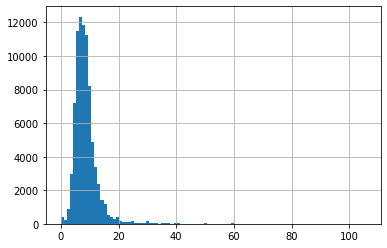

In [17]:
all_data_lagged["Close"].hist(bins=100);

Features seem to be positive skew, and have different scale. --> Need to standardise

In [18]:
all_data_lagged.columns

Index(['Date', 'HH', 'Time', 'System_price(Yen/kWh)',
       'Price_Hokkaido(Yen/kWh)', 'Price_Tokyo(Yen/kWh)',
       'Price_Kansai(Yen/kWh)', 'BidExceed_diff', 'Planned_Min_flag',
       'Planned_Max_flag',
       ...
       'Allarea_Thermal_lag_3_Day', 'Allarea_Geothermal_lag_3_Day',
       'Allarea_Biomass_lag_3_Day', 'Allarea_PumpedStorage_lag_3_Day',
       'Allarea_Interconnection_lag_3_Day', 'Water_Ratio_lag_3_Day',
       'Thermal_Ratio_lag_3_Day', 'Geothermal_Ratio_lag_3_Day',
       'VWAP_lag_3_Day', 'Close'],
      dtype='object', length=129)

In [19]:
all_data_lagged1 = all_data_lagged[['Date', 'Time', 'HH', 'month', 'dayofweek', 'holiday', 'Planned_Min_flag', 'Planned_Max_flag']]
all_data_lagged2 = all_data_lagged.drop(['Date', 'Time', 'HH', 'month', 'dayofweek', 'holiday', 'Planned_Min_flag', 'Planned_Max_flag'], axis=1)

In [20]:
# PowerTransformer() with Yeo-Johnson
from sklearn.preprocessing import PowerTransformer
def trans_yeo_johnson(df, df2):
    pt = PowerTransformer() #default: Yeo-Johnson (this allow also 0-value to transform to logarithmic value)
    pt.fit_transform(df)
    return pt.transform(df2)

def inverse_trans_yeo_johnson(df, df2):
    pt = PowerTransformer() #default: Yeo-Johnson (this allow also 0-value to transform to logarithmic value)
    pt.fit_transform(df)
    return pt.inverse_transform(df2)

In [21]:
#　Transformation
all_data_log2_transformed = all_data_lagged2.copy()
cols = all_data_log2_transformed.columns

all_data_log2_transformed = trans_yeo_johnson(all_data_lagged2, all_data_log2_transformed)
all_data_log2_transformed = pd.DataFrame(all_data_log2_transformed)
all_data_log2_transformed.columns = cols

In [22]:
all_data_log = pd.concat([all_data_lagged1, all_data_log2_transformed], axis=1)

In [23]:
all_data_log.tail()

,Date,Time,HH,month,dayofweek,holiday,Planned_Min_flag,Planned_Max_flag,System_price(Yen/kWh),Price_Hokkaido(Yen/kWh),Price_Tokyo(Yen/kWh),Price_Kansai(Yen/kWh),BidExceed_diff,Spot_MA25d,Spot_MA75d,Spot_MA200d,Open_lag_2_Day,High_lag_2_Day,Low_lag_2_Day,Close_lag_2_Day,Average_lag_2_Day,Volume(MWh/h)_lag_2_Day,Volume(Tick count)_lag_2_Day,HourlyDemand_Hokkaido_lag_2_Day,HourlyDemand_Tokyo_lag_2_Day,HourlyDemand_Kansai_lag_2_Day,HourlyDemand_Okinawa_lag_2_Day,Wind_TOH_lag_2_Day,Geothermal_TOH_lag_2_Day,PumpedStorage_TOH_lag_2_Day,Interconnection_TOH_lag_2_Day,Geothermal_HOK_lag_2_Day,Wind_HOK_lag_2_Day,Interconnection_HOK_lag_2_Day,Wind_TKO_lag_2_Day,Interconnection_TKO_lag_2_Day,Wind_CHB_lag_2_Day,Interconnection_CHB_lag_2_Day,Wind_HKU_lag_2_Day,PumpedStorage_HKU_lag_2_Day,Interconnection_HKU_lag_2_Day,Nuclear_KAN_lag_2_Day,Wind_KAN_lag_2_Day,Interconnection_KAN_lag_2_Day,Thermal_CHG_lag_2_Day,Water_CHG_lag_2_Day,Wind_CHG_lag_2_Day,Interconnection_CHG_lag_2_Day,Nuclear_SHI_lag_2_Day,Wind_SHI_lag_2_Day,Interconnection_SHI_lag_2_Day,Nuclear_KYU_lag_2_Day,Geothermal_KYU_lag_2_Day,PV_KYU_lag_2_Day,PVCurtailment_KYU_lag_2_Day,Wind_KYU_lag_2_Day,WindCurtailment_KYU_lag_2_Day,Interconnection_KYU_lag_2_Day,Thermal_OKI_lag_2_Day,Biomass_OKI_lag_2_Day,Wind_OKI_lag_2_Day,Allarea_TotalDemand_lag_2_Day,Allarea_Water_lag_2_Day,Allarea_Thermal_lag_2_Day,Allarea_Geothermal_lag_2_Day,Allarea_Biomass_lag_2_Day,Allarea_PumpedStorage_lag_2_Day,Allarea_Interconnection_lag_2_Day,Water_Ratio_lag_2_Day,Thermal_Ratio_lag_2_Day,Geothermal_Ratio_lag_2_Day,VWAP_lag_2_Day,Open_lag_3_Day,High_lag_3_Day,Low_lag_3_Day,Close_lag_3_Day,Average_lag_3_Day,Volume(MWh/h)_lag_3_Day,Volume(Tick count)_lag_3_Day,HourlyDemand_Hokkaido_lag_3_Day,HourlyDemand_Tokyo_lag_3_Day,HourlyDemand_Kansai_lag_3_Day,HourlyDemand_Okinawa_lag_3_Day,Wind_TOH_lag_3_Day,Geothermal_TOH_lag_3_Day,PumpedStorage_TOH_lag_3_Day,Interconnection_TOH_lag_3_Day,Geothermal_HOK_lag_3_Day,Wind_HOK_lag_3_Day,Interconnection_HOK_lag_3_Day,Wind_TKO_lag_3_Day,Interconnection_TKO_lag_3_Day,Wind_CHB_lag_3_Day,Interconnection_CHB_lag_3_Day,Wind_HKU_lag_3_Day,PumpedStorage_HKU_lag_3_Day,Interconnection_HKU_lag_3_Day,Nuclear_KAN_lag_3_Day,Wind_KAN_lag_3_Day,Interconnection_KAN_lag_3_Day,Thermal_CHG_lag_3_Day,Water_CHG_lag_3_Day,Wind_CHG_lag_3_Day,Interconnection_CHG_lag_3_Day,Nuclear_SHI_lag_3_Day,Wind_SHI_lag_3_Day,Interconnection_SHI_lag_3_Day,Nuclear_KYU_lag_3_Day,Geothermal_KYU_lag_3_Day,PV_KYU_lag_3_Day,PVCurtailment_KYU_lag_3_Day,Wind_KYU_lag_3_Day,WindCurtailment_KYU_lag_3_Day,Interconnection_KYU_lag_3_Day,Thermal_OKI_lag_3_Day,Biomass_OKI_lag_3_Day,Wind_OKI_lag_3_Day,Allarea_TotalDemand_lag_3_Day,Allarea_Water_lag_3_Day,Allarea_Thermal_lag_3_Day,Allarea_Geothermal_lag_3_Day,Allarea_Biomass_lag_3_Day,Allarea_PumpedStorage_lag_3_Day,Allarea_Interconnection_lag_3_Day,Water_Ratio_lag_3_Day,Thermal_Ratio_lag_3_Day,Geothermal_Ratio_lag_3_Day,VWAP_lag_3_Day,Close
83232,2020-12-31,21:30:00,44,12,3,0,0.0,0.0,4.063279,2.662748,3.253262,4.812611,-0.504388,3.603386,0.243553,-0.567171,2.929164,2.280778,2.468040,1.530581,3.037431,1.596300,1.874723,0.959799,-0.099750,-0.477586,-0.483745,0.794554,2.256819,0.002207,-1.669710,-0.079850,0.067846,-1.090294,1.173640,1.828739,-1.155730,-0.590297,1.820989,-0.078296,-0.915936,-1.584485,0.862698,0.432705,0.845091,0.506801,0.559975,0.118667,-0.963722,1.547765,0.955635,0.614949,2.772968,-1.044186,-0.208739,0.798499,-0.090149,-0.301519,-0.297990,1.072444,-1.465058,-0.285181,-1.500341,0.573450,2.997543,1.240141,0.098547,-2.142957,-1.438463,1.819139,3.361745,-1.067846,0.638611,2.050706,0.182909,1.530709,1.251536,0.809590,1.281355,0.887327,0.111735,-0.266215,-0.665775,0.603535,2.342855,0.001872,-0.716725,0.074579,1.517086,0.169382,0.913389,-0.171655,0.631686,0.082502,-1.250849,-0.078628,-0.752212,-1.584485,0.797385,0.339690,0.816480,0.563778,0.966366,0.768978,-0.963722,-0.084648,1.013510,0.587071,2.947443,-1.043733,-0.208739,0.889880,-0.090149,0.047712,-0.510713,1.072089,0.526623,

Skew: 0.018881
Kurt: 5.002006
Mean: 0.000000
Std: 1.000006


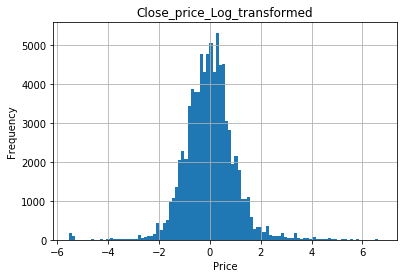

In [24]:
fig, ax = plt.subplots(1, figsize=plt.figaspect(.65))

all_data_log["Close"].hist(bins=100);
print("Skew: %f" % all_data_log["Close"].skew())
print("Kurt: %f" % all_data_log["Close"].kurt())
print("Mean: %f" % all_data_log["Close"].mean())
print("Std: %f" % all_data_log["Close"].std())
ax.set(title="Close_price_Log_transformed", ylabel="Frequency", xlabel="Price");

※ Confirm whether inverse transform works for Close price appropriately, or not

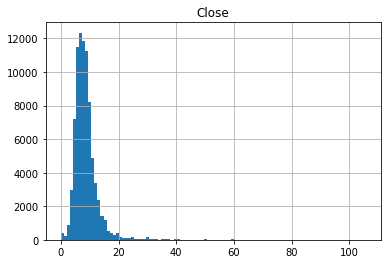

In [25]:
# inverse only for Close (Target)
y_log_inversed = inverse_trans_yeo_johnson(all_data_lagged2["Close"].values.reshape(-1,1), all_data_log["Close"].values.reshape(-1, 1))
y_log_inversed = pd.DataFrame(y_log_inversed)
y_log_inversed.columns = ["Close"]
y_log_inversed.hist(bins=100);

# EDA (for all_data)

## Check the correlation of features with the target

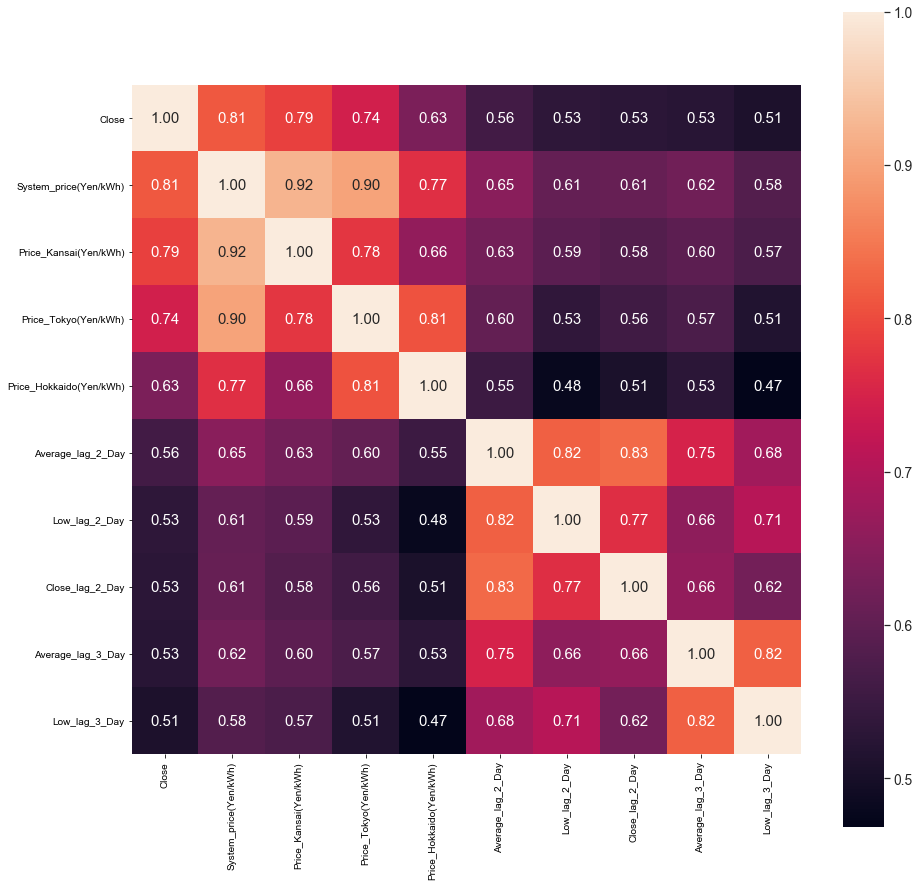

In [26]:
# correlation matrix
corrmat = all_data_log.corr()

# revenue correlation matrix
k = 10 # The number of variables on the heatmap
cols = corrmat.nlargest(k, 'Close')['Close'].index
cm = np.corrcoef(all_data_log[cols].values.T)
f, ax = plt.subplots(figsize=(15, 15))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

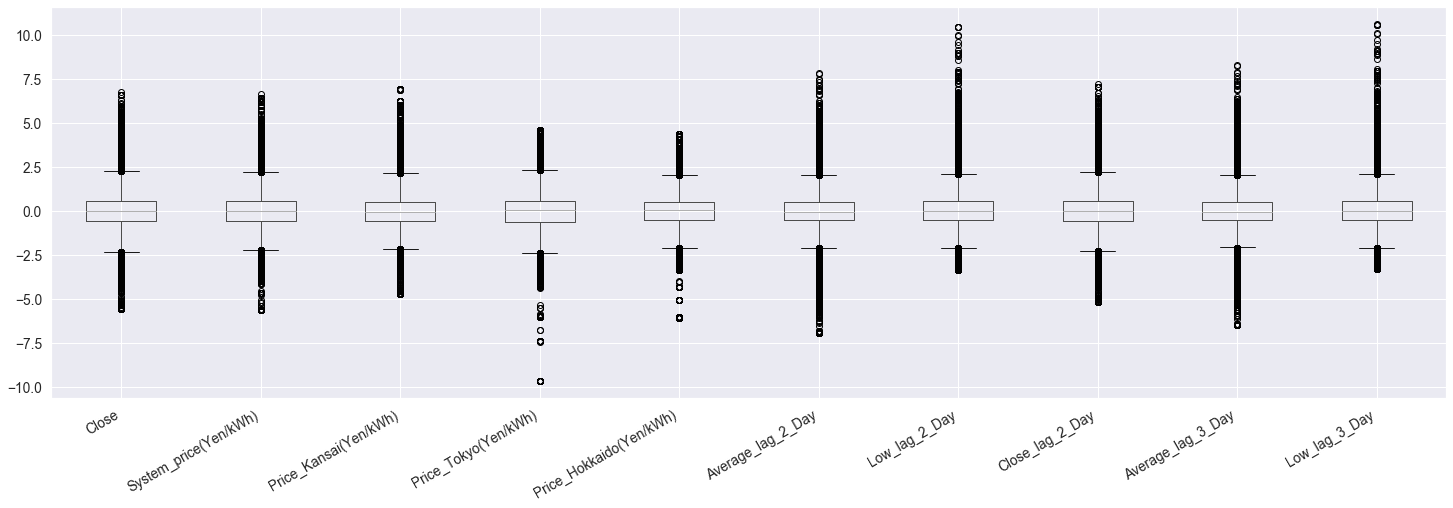

In [28]:
plt.figure(figsize = (25,8))
all_data_log[cols].boxplot()
plt.gcf().autofmt_xdate()

plt.show()

Feature scaling is also completed.

In [99]:
# all_data after pre-processing 
all_data_log.tail()

,Date,Time,HH,month,dayofweek,holiday,Planned_Min_flag,Planned_Max_flag,System_price(Yen/kWh),Price_Hokkaido(Yen/kWh),Price_Tokyo(Yen/kWh),Price_Kansai(Yen/kWh),BidExceed_diff,Spot_MA25d,Spot_MA75d,Spot_MA200d,Open_lag_2_Day,High_lag_2_Day,Low_lag_2_Day,Close_lag_2_Day,Average_lag_2_Day,Volume(MWh/h)_lag_2_Day,Volume(Tick count)_lag_2_Day,HourlyDemand_Hokkaido_lag_2_Day,HourlyDemand_Tokyo_lag_2_Day,HourlyDemand_Kansai_lag_2_Day,HourlyDemand_Okinawa_lag_2_Day,Wind_TOH_lag_2_Day,Geothermal_TOH_lag_2_Day,PumpedStorage_TOH_lag_2_Day,Interconnection_TOH_lag_2_Day,Geothermal_HOK_lag_2_Day,Wind_HOK_lag_2_Day,Interconnection_HOK_lag_2_Day,Wind_TKO_lag_2_Day,Interconnection_TKO_lag_2_Day,Wind_CHB_lag_2_Day,Interconnection_CHB_lag_2_Day,Wind_HKU_lag_2_Day,PumpedStorage_HKU_lag_2_Day,Interconnection_HKU_lag_2_Day,Nuclear_KAN_lag_2_Day,Wind_KAN_lag_2_Day,Interconnection_KAN_lag_2_Day,Thermal_CHG_lag_2_Day,Water_CHG_lag_2_Day,Wind_CHG_lag_2_Day,Interconnection_CHG_lag_2_Day,Nuclear_SHI_lag_2_Day,Wind_SHI_lag_2_Day,Interconnection_SHI_lag_2_Day,Nuclear_KYU_lag_2_Day,Geothermal_KYU_lag_2_Day,PV_KYU_lag_2_Day,PVCurtailment_KYU_lag_2_Day,Wind_KYU_lag_2_Day,WindCurtailment_KYU_lag_2_Day,Interconnection_KYU_lag_2_Day,Thermal_OKI_lag_2_Day,Biomass_OKI_lag_2_Day,Wind_OKI_lag_2_Day,Allarea_TotalDemand_lag_2_Day,Allarea_Water_lag_2_Day,Allarea_Thermal_lag_2_Day,Allarea_Geothermal_lag_2_Day,Allarea_Biomass_lag_2_Day,Allarea_PumpedStorage_lag_2_Day,Allarea_Interconnection_lag_2_Day,Water_Ratio_lag_2_Day,Thermal_Ratio_lag_2_Day,Geothermal_Ratio_lag_2_Day,VWAP_lag_2_Day,Open_lag_3_Day,High_lag_3_Day,Low_lag_3_Day,Close_lag_3_Day,Average_lag_3_Day,Volume(MWh/h)_lag_3_Day,Volume(Tick count)_lag_3_Day,HourlyDemand_Hokkaido_lag_3_Day,HourlyDemand_Tokyo_lag_3_Day,HourlyDemand_Kansai_lag_3_Day,HourlyDemand_Okinawa_lag_3_Day,Wind_TOH_lag_3_Day,Geothermal_TOH_lag_3_Day,PumpedStorage_TOH_lag_3_Day,Interconnection_TOH_lag_3_Day,Geothermal_HOK_lag_3_Day,Wind_HOK_lag_3_Day,Interconnection_HOK_lag_3_Day,Wind_TKO_lag_3_Day,Interconnection_TKO_lag_3_Day,Wind_CHB_lag_3_Day,Interconnection_CHB_lag_3_Day,Wind_HKU_lag_3_Day,PumpedStorage_HKU_lag_3_Day,Interconnection_HKU_lag_3_Day,Nuclear_KAN_lag_3_Day,Wind_KAN_lag_3_Day,Interconnection_KAN_lag_3_Day,Thermal_CHG_lag_3_Day,Water_CHG_lag_3_Day,Wind_CHG_lag_3_Day,Interconnection_CHG_lag_3_Day,Nuclear_SHI_lag_3_Day,Wind_SHI_lag_3_Day,Interconnection_SHI_lag_3_Day,Nuclear_KYU_lag_3_Day,Geothermal_KYU_lag_3_Day,PV_KYU_lag_3_Day,PVCurtailment_KYU_lag_3_Day,Wind_KYU_lag_3_Day,WindCurtailment_KYU_lag_3_Day,Interconnection_KYU_lag_3_Day,Thermal_OKI_lag_3_Day,Biomass_OKI_lag_3_Day,Wind_OKI_lag_3_Day,Allarea_TotalDemand_lag_3_Day,Allarea_Water_lag_3_Day,Allarea_Thermal_lag_3_Day,Allarea_Geothermal_lag_3_Day,Allarea_Biomass_lag_3_Day,Allarea_PumpedStorage_lag_3_Day,Allarea_Interconnection_lag_3_Day,Water_Ratio_lag_3_Day,Thermal_Ratio_lag_3_Day,Geothermal_Ratio_lag_3_Day,VWAP_lag_3_Day,Close
83232,2020-12-31,21:30:00,44,12,3,0,0.0,0.0,4.063279,2.662748,3.253262,4.812611,-0.504388,3.603386,0.243553,-0.567171,2.929164,2.280778,2.468040,1.530581,3.037431,1.596300,1.874723,0.959799,-0.099750,-0.477586,-0.483745,0.794554,2.256819,0.002207,-1.669710,-0.079850,0.067846,-1.090294,1.173640,1.828739,-1.155730,-0.590297,1.820989,-0.078296,-0.915936,-1.584485,0.862698,0.432705,0.845091,0.506801,0.559975,0.118667,-0.963722,1.547765,0.955635,0.614949,2.772968,-1.044186,-0.208739,0.798499,-0.090149,-0.301519,-0.297990,1.072444,-1.465058,-0.285181,-1.500341,0.573450,2.997543,1.240141,0.098547,-2.142957,-1.438463,1.819139,3.361745,-1.067846,0.638611,2.050706,0.182909,1.530709,1.251536,0.809590,1.281355,0.887327,0.111735,-0.266215,-0.665775,0.603535,2.342855,0.001872,-0.716725,0.074579,1.517086,0.169382,0.913389,-0.171655,0.631686,0.082502,-1.250849,-0.078628,-0.752212,-1.584485,0.797385,0.339690,0.816480,0.563778,0.966366,0.768978,-0.963722,-0.084648,1.013510,0.587071,2.947443,-1.043733,-0.208739,0.889880,-0.090149,0.047712,-0.510713,1.072089,0.526623,

# Model training and evaluation

## Preparation

In [30]:
all_data_log.shape

(83237, 129)

In [31]:
X = all_data_log.drop(['Close', 'Date', 'Time'], axis=1)
y = all_data_log.Closey = all_data_log.Close

Split all_data into train and valid for validation

In [32]:
# Rolling/Walk forward validation (Timeseries validation with the parameter of "max_train_size")
from sklearn.model_selection import TimeSeriesSplit

n_splits=10
train_ratio=8
test_ratio=2
max_train_size=int(round((len(X)*train_ratio)/(train_ratio+test_ratio*n_splits), 0))
test_size=int(round((len(X)*test_ratio)/(train_ratio+test_ratio*n_splits), 0))

tscv = TimeSeriesSplit(n_splits=n_splits, test_size=test_size
#                        , max_train_size=max_train_size
                      )
Min_valid_index = len(X) - (n_splits * test_size)

print(tscv)
print('Minimum of valid_index: %.0f' % Min_valid_index)

# Confirming the split logic
for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    print("TRAIN:", train_index, "Valid:", valid_index)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=5946)
Minimum of valid_index: 23777
TRAIN: [    0     1     2 ... 23774 23775 23776] Valid: [23777 23778 23779 ... 29720 29721 29722]
TRAIN: [    0     1     2 ... 29720 29721 29722] Valid: [29723 29724 29725 ... 35666 35667 35668]
TRAIN: [    0     1     2 ... 35666 35667 35668] Valid: [35669 35670 35671 ... 41612 41613 41614]
TRAIN: [    0     1     2 ... 41612 41613 41614] Valid: [41615 41616 41617 ... 47558 47559 47560]
TRAIN: [    0     1     2 ... 47558 47559 47560] Valid: [47561 47562 47563 ... 53504 53505 53506]
TRAIN: [    0     1     2 ... 53504 53505 53506] Valid: [53507 53508 53509 ... 59450 59451 59452]
TRAIN: [    0     1     2 ... 59450 59451 59452] Valid: [59453 59454 59455 ... 65396 65397 65398]
TRAIN: [    0     1     2 ... 65396 65397 65398] Valid: [65399 65400 65401 ... 71342 71343 71344]
TRAIN: [    0     1     2 ... 71342 71343 71344] Valid: [71345 71346 71347 ... 77288 77289 77290]
TRAIN: [    0  

Make the tables for graph visualisation and for evaluation results

In [33]:
# DataTable for graph_log
graph_data_log = all_data_log[["Date", "Time", "Close"]]
graph_data_log["DateTime"] = pd.to_datetime(graph_data_log["Date"].astype(str) + " " + graph_data_log["Time"].astype(str))
prediction_point = graph_data_log["DateTime"][graph_data_log.index==Min_valid_index].iat[-1]
graph_data_log = graph_data_log.drop(["Date", "Time"], axis=1)
print("Prediction_point: {}".format(prediction_point))

# DataTable for Evaluation results_log
Eval_table_log = pd.DataFrame()
Eval_table_log["EvalFunc"] = pd.Series(["RMSE_log", "MAE_log"])
Eval_table_log

Prediction_point: 2017-08-09 08:30:00


,EvalFunc
0,RMSE_log
1,MAE_log


In [34]:
# DataTable for graph_original
graph_data_original = all_data_lagged[["Date", "Time", "Close"]]
graph_data_original["DateTime"] = pd.to_datetime(graph_data_original["Date"].astype(str) + " " + graph_data_original["Time"].astype(str))
prediction_point = graph_data_original["DateTime"][graph_data_original.index==Min_valid_index].iat[-1]
graph_data_original = graph_data_original.drop(["Date", "Time"], axis=1)
print("Prediction_point: {}".format(prediction_point))

# DataTable for Evaluation functions_original
Eval_table_original = pd.DataFrame()
Eval_table_original["EvalFunc"] = pd.Series(["RMSE_Yen/kWh", "MAE_Yen/kWh"])
Eval_table_original

Prediction_point: 2017-08-09 08:30:00


,EvalFunc
0,RMSE_Yen/kWh
1,MAE_Yen/kWh


## Linear model

### Linear regression

In [35]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from numpy import sqrt
import itertools

training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
prediction_Line = []

for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    #Fit train set to the model (Chooose one model)
    modelLine = LinearRegression().fit(X_train, y_train)

    # Generate prediction results
    y_pred = modelLine.predict(X_valid)
    true_values = y_valid.values
    # Save prediction results
    prediction_Line.append(y_pred)
    # Save evaluation results for each 10 validation and get mean
    training_accuracy.append(modelLine.score(X_train, y_train))     
    valid_accuracy.append(modelLine.score(X_valid, y_valid))     
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# print("Training_accuracy: {}".format(training_accuracy))
print("Training_accuracy: {}".format(np.mean(training_accuracy)))
# print("Valid_accuracy: {}".format(valid_accuracy))
print("Valid_accuracy: {}".format(np.mean(valid_accuracy)))

# print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

# Convert prediction results with valid data from 2D list to 1D list
prediction_Line = list(itertools.chain.from_iterable(prediction_Line))
# Prediction with train data
y_pred_train = list(modelLine.predict(X_train)[:Min_valid_index])
# Store the prediction into the "graph data" table
graph_data_log["Close_pred_Linear"] = pd.Series(y_pred_train + prediction_Line)
# Store the result of evaluation into the "Eval_table"
Eval_table_log["Linear"] = pd.Series([np.mean(rmse), np.mean(mae)])
rmse_10fold_Linear = pd.Series(rmse)
mae_10fold_Linear = pd.Series(mae)

Training_accuracy: 0.6502979830020057
Valid_accuracy: 0.5386248140546919
RMSE: 0.6080416855716432
MAE: 0.4309379445757787


In [36]:
rmse

[0.5546641390621865,
 0.5238936006243287,
 0.5666275248199817,
 0.5280543569632954,
 0.6466499812700253,
 0.5688303359047185,
 0.6023519276276659,
 0.6966468323780556,
 0.7715093389779504,
 0.6211888180882228]

In [37]:
mae

[0.38910165797859186,
 0.3805094959640819,
 0.4196649497804815,
 0.4026892358952931,
 0.47686943820131933,
 0.39786071304430687,
 0.4265245934852403,
 0.47701706665332855,
 0.5285878920535734,
 0.4105544027015704]

### Ridge

In [38]:
# Searching the optimal alpha
for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    # For the test of alpha
    for alpha in [0.1, 1, 3, 7, 10]: # alphaで特に結果の違いなし (0.1, 1, 3, 7, 10)
        modelRidge = Ridge(alpha=alpha).fit(X_train, y_train)
        print("\n alpha={}".format(str(alpha)))
        print("Train set score: {:.2f}".format(modelRidge.score(X_train, y_train)))
        print("Test set score: {:.2f}".format(modelRidge.score(X_valid, y_valid)))
        y_pred = modelRidge.predict(X_valid)       
        print("RMSE: {:.2f}".format(sqrt(mean_squared_error(y_valid, y_pred))) )      
        print("MAE: {:.2f}".format(mean_absolute_error(y_valid, y_pred)))
        print("Number of features used:{}".format(np.sum(modelRidge.coef_ != 0)))


 alpha=0.1
Train set score: 0.66
Test set score: 0.52
RMSE: 0.55
MAE: 0.39
Number of features used:123

 alpha=1
Train set score: 0.66
Test set score: 0.52
RMSE: 0.55
MAE: 0.39
Number of features used:123

 alpha=3
Train set score: 0.66
Test set score: 0.52
RMSE: 0.55
MAE: 0.39
Number of features used:123

 alpha=7
Train set score: 0.66
Test set score: 0.52
RMSE: 0.55
MAE: 0.39
Number of features used:123

 alpha=10
Train set score: 0.66
Test set score: 0.52
RMSE: 0.55
MAE: 0.39
Number of features used:123

 alpha=0.1
Train set score: 0.63
Test set score: 0.66
RMSE: 0.52
MAE: 0.38
Number of features used:120

 alpha=1
Train set score: 0.63
Test set score: 0.66
RMSE: 0.52
MAE: 0.38
Number of features used:120

 alpha=3
Train set score: 0.63
Test set score: 0.66
RMSE: 0.52
MAE: 0.38
Number of features used:120

 alpha=7
Train set score: 0.63
Test set score: 0.66
RMSE: 0.52
MAE: 0.38
Number of features used:120

 alpha=10
Train set score: 0.63
Test set score: 0.66
RMSE: 0.52
MAE: 0.38
Nu

10 is the optimal

In [39]:
training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
prediction_Ridge = []

for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    #Fit train set to the model
    modelRidge = linear_model.Ridge(alpha=10).fit(X_train, y_train)

    # Generate prediction results
    y_pred = modelRidge.predict(X_valid)
    true_values = y_valid.values
    # Save prediction results
    prediction_Ridge.append(y_pred)
    # Save evaluation results for each 10 validation and get mean
    training_accuracy.append(modelRidge.score(X_train, y_train))     
    valid_accuracy.append(modelRidge.score(X_valid, y_valid))     
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# print("Training_accuracy: {}".format(training_accuracy))
print("Training_accuracy: {}".format(np.mean(training_accuracy)))
# print("Valid_accuracy: {}".format(valid_accuracy))
print("Valid_accuracy: {}".format(np.mean(valid_accuracy)))

# print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

# Convert prediction results with valid data from 2D list to 1D list
prediction_Ridge = list(itertools.chain.from_iterable(prediction_Ridge))
# Prediction with train data
y_pred_train = list(modelRidge.predict(X_train)[:Min_valid_index])
# Store the prediction into the "graph data" table
graph_data_log["Close_pred_Ridge"] = pd.Series(y_pred_train + prediction_Ridge)
# Store the result of evaluation into the "Eval_table"
Eval_table_log["Ridge"] = pd.Series([np.mean(rmse), np.mean(mae)])
rmse_10fold_Ridge = pd.Series(rmse)
mae_10fold_Ridge = pd.Series(mae)

Training_accuracy: 0.6502867232547516
Valid_accuracy: 0.5391885427473524
RMSE: 0.6077197748816277
MAE: 0.4305920621715062


In [40]:
rmse

[0.5543652192014195,
 0.5240074925813516,
 0.565856643687398,
 0.5267097621422938,
 0.646446438915108,
 0.5688747458687198,
 0.602317370025118,
 0.6966079151237113,
 0.7713920164281705,
 0.6206201448429867]

In [41]:
mae

[0.3886569287407804,
 0.380566252147163,
 0.418884215877639,
 0.40138943841150865,
 0.4766695222645213,
 0.3978708038210129,
 0.42643623578135403,
 0.47701305689978596,
 0.5284573290776129,
 0.4099768386936842]

### Lasso

In [42]:
for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    # For the test of alpha
    for alpha in [0.02, 0.5, 1]: #0.02 is the best (0.02, 0.5, 1)
        modelLasso = Lasso(alpha=alpha).fit(X_train, y_train)
        print("\n alpha={}".format(str(alpha)))
        print("Train set score: {:.2f}".format(modelLasso.score(X_train, y_train)))
        print("Test set score: {:.2f}".format(modelLasso.score(X_valid, y_valid)))
        y_pred = modelLasso.predict(X_valid)       
        print("RMSE: {:.2f}".format(sqrt(mean_squared_error(y_valid, y_pred))) )      
        print("MAE: {:.2f}".format(mean_absolute_error(y_valid, y_pred)))
        print("Number of features used:{}".format(np.sum(modelLasso.coef_ != 0)))


 alpha=0.02
Train set score: 0.63
Test set score: 0.51
RMSE: 0.56
MAE: 0.38
Number of features used:18

 alpha=0.5
Train set score: 0.06
Test set score: 0.04
RMSE: 0.78
MAE: 0.59
Number of features used:1

 alpha=1
Train set score: 0.06
Test set score: 0.04
RMSE: 0.78
MAE: 0.59
Number of features used:1

 alpha=0.02
Train set score: 0.61
Test set score: 0.63
RMSE: 0.55
MAE: 0.41
Number of features used:17

 alpha=0.5
Train set score: 0.06
Test set score: -0.54
RMSE: 1.12
MAE: 0.86
Number of features used:1

 alpha=1
Train set score: 0.05
Test set score: -0.54
RMSE: 1.12
MAE: 0.86
Number of features used:1

 alpha=0.02
Train set score: 0.66
Test set score: 0.62
RMSE: 0.53
MAE: 0.38
Number of features used:20

 alpha=0.5
Train set score: 0.07
Test set score: -0.01
RMSE: 0.87
MAE: 0.60
Number of features used:2

 alpha=1
Train set score: 0.04
Test set score: -0.01
RMSE: 0.87
MAE: 0.60
Number of features used:1

 alpha=0.02
Train set score: 0.65
Test set score: 0.47
RMSE: 0.49
MAE: 0.37
N

0.02 is the optimal

In [43]:
training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
prediction_Lasso = []

for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    #Fit train set to the model (Chooose one model)
    modelLasso = linear_model.Lasso(alpha=0.02).fit(X_train, y_train)

    # Generate prediction results
    y_pred = modelLasso.predict(X_valid)
    true_values = y_valid.values
    # Save prediction results
    prediction_Lasso.append(y_pred)
    # Save evaluation results for each 10 validation and get mean
    training_accuracy.append(modelLasso.score(X_train, y_train))     
    valid_accuracy.append(modelLasso.score(X_valid, y_valid))     
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# print("Training_accuracy: {}".format(training_accuracy))
print("Training_accuracy: {}".format(np.mean(training_accuracy)))
# print("Valid_accuracy: {}".format(valid_accuracy))
print("Valid_accuracy: {}".format(np.mean(valid_accuracy)))

# print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

# Convert prediction results with valid data from 2D list to 1D list
prediction_Lasso = list(itertools.chain.from_iterable(prediction_Lasso))
# Prediction with train data
y_pred_train = list(modelLasso.predict(X_train)[:Min_valid_index])
# Store the prediction into the "graph data" table
graph_data_log["Close_pred_Lasso"] = pd.Series(y_pred_train + prediction_Lasso)
# Store the result of evaluation into the "Eval_table"
Eval_table_log["Lasso"] = pd.Series([np.mean(rmse), np.mean(mae)])
rmse_10fold_Lasso = pd.Series(rmse)
mae_10fold_Lasso = pd.Series(mae)

Training_accuracy: 0.6345050805298386
Valid_accuracy: 0.5564409977013466
RMSE: 0.5989540442173967
MAE: 0.42022492648322773


In [44]:
rmse

[0.5562744815260185,
 0.5524874081537432,
 0.5348781215865028,
 0.4905191352681698,
 0.6071698984802824,
 0.5759355923547725,
 0.5879139069542589,
 0.707204801025531,
 0.7603265724104851,
 0.616830524414203]

In [45]:
mae

[0.38410674300617736,
 0.41214763567699614,
 0.3756235505691139,
 0.3650921640925861,
 0.4427017829205779,
 0.40896378727702154,
 0.39886362664117075,
 0.48897551508988574,
 0.5171494304378856,
 0.40862502912086196]

### Interpretation of the linear model
https://scikit-learn.org/stable/auto_examples/inspection/plot_linear_model_coefficient_interpretation.html

In [46]:
print("Intercept: {}".format(modelLine.intercept_))

feature_names = X_train.columns
coefs = pd.DataFrame(modelLasso.coef_, columns=['Coefficients'], index=feature_names
).sort_values('Coefficients', ascending=False)

# Absolute value of coefficients
coef_abs = coefs.abs()
print(coef_abs.head(10))

Intercept: 0.08408114225644028
                               Coefficients
System_price(Yen/kWh)              0.440287
Price_Kansai(Yen/kWh)              0.245256
Price_Tokyo(Yen/kWh)               0.105903
Close_lag_2_Day                    0.023760
Low_lag_2_Day                      0.019909
Interconnection_HKU_lag_2_Day      0.019313
Low_lag_3_Day                      0.011879
Price_Hokkaido(Yen/kWh)            0.005193
Interconnection_SHI_lag_2_Day      0.005121
Interconnection_SHI_lag_3_Day      0.004120


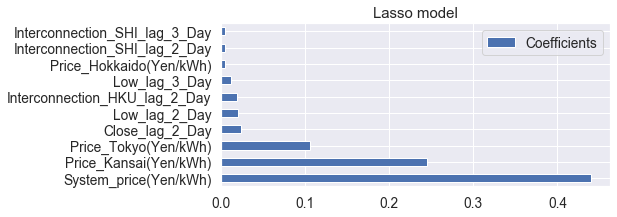

In [47]:
# Positive coeficients
coefs[:10].plot(kind='barh', figsize=(9, 3))
plt.title('Lasso model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

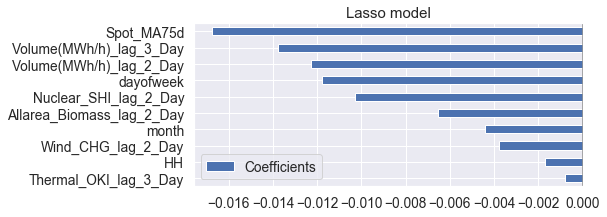

In [48]:
# Negative coeficients
end = len(coefs)
start = end - 10
coefs[start:end].plot(kind='barh', figsize=(9, 3))
plt.title('Lasso model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

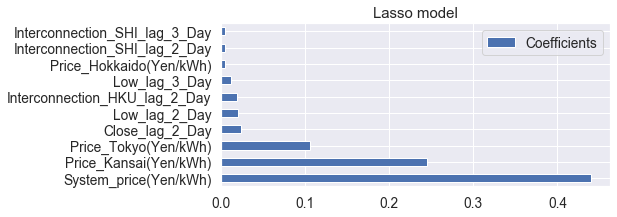

In [49]:
# Absolute coeficients
coef_abs[:10].plot(kind='barh', figsize=(9, 3))
plt.title('Lasso model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)

## Non-linear model

### Linear Regression with PolynomialFeatures

In [50]:
X.shape

(83237, 126)

In [51]:
# Make polynominal features
from sklearn.preprocessing import PolynomialFeatures

dimension = 2
polynomial = PolynomialFeatures(degree=dimension)
Poly_X = polynomial.fit_transform(X)
Poly_X = pd.DataFrame(Poly_X)

In [52]:
Poly_X.shape

(83237, 8128)

Skip now because kernel dies due to the spec of my PC. Run the following code only after reducing the number of features sufficiently. 

In [53]:
# training_accuracy = []
# valid_accuracy = []
# rmse = []
# mae = []
# prediction_PolyLine = []
    
# for train_index, valid_index in tscv.split(X):
#     # Divide the train/valid set  into 10 folds and pick up it.
#     X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
#     y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
#     #Fit train set to the model (Chooose one model)
#     modelPolyLine = LinearRegression().fit(X_train, y_train)
    
#     # Generate prediction results
#     y_pred = modelPolyLine.predict(X_valid)
#     true_values = y_valid.values
#     # Save prediction results
#     prediction_PolyLine.append(y_pred)
#     # Save evaluation results for each 10 validation and get mean
#     training_accuracy.append(modelPolyLine.score(X_train, y_train))     
#     valid_accuracy.append(modelPolyLine.score(X_valid, y_valid))     
#     rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
#     mae.append(mean_absolute_error(true_values, y_pred))

# # print("Training_accuracy: {}".format(training_accuracy))
# print("Training_accuracy: {}".format(np.mean(training_accuracy)))
# # print("Valid_accuracy: {}".format(valid_accuracy))
# print("Valid_accuracy: {}".format(np.mean(valid_accuracy)))

# # print("RMSE: {}".format(rmse))
# print("RMSE: {}".format(np.mean(rmse)))
# # print("MAE: {}".format(mae))
# print("MAE: {}".format(np.mean(mae)))

# # Convert prediction results with valid data from 2D list to 1D list
# prediction_PolyLine = list(itertools.chain.from_iterable(prediction_PolyLine))
# # Prediction with train data
# y_pred_train = list(modelPolyLine.predict(X_train)[:Min_valid_index])
# # Store the prediction into the "graph data" table
# #graph_data_log = graph_data_log.reset_index()
# graph_data_log["Close_pred_PolyLinear"] = pd.Series(y_pred_train + prediction_PolyLine)
# # Store the result of evaluation into the "Eval_table"
# Eval_table_log["PolyLinear"] = pd.Series([np.mean(rmse), np.mean(mae)])

### XGBoost

In [54]:
from xgboost import XGBRegressor

training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
prediction_XGB = []

for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

    #Fit train set to the model
    modelXGB = XGBRegressor().fit(X_train, y_train)   
    # Generate prediction results
    y_pred = modelXGB.predict(X_valid)
    true_values = y_valid.values
    # Save prediction results
    prediction_XGB.append(y_pred)
    # Save evaluation results for each 10 validation and get mean
    training_accuracy.append(modelXGB.score(X_train, y_train))     
    valid_accuracy.append(modelXGB.score(X_valid, y_valid))     
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# print("Training_accuracy: {}".format(training_accuracy))
print("Training_accuracy: {}".format(np.mean(training_accuracy)))
# print("Valid_accuracy: {}".format(valid_accuracy))
print("Valid_accuracy: {}".format(np.mean(valid_accuracy)))

# print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

# Convert prediction results with valid data from 2D list to 1D list
prediction_XGB = list(itertools.chain.from_iterable(prediction_XGB))
# Prediction with train data
y_pred_train = list(modelXGB.predict(X_train)[:Min_valid_index])
# Store the prediction into the "graph data" table
graph_data_log["Close_pred_XGB"] = pd.Series(y_pred_train + prediction_XGB)
# Store the result of evaluation into the "Eval_table"
Eval_table_log["XGB"] = pd.Series([np.mean(rmse), np.mean(mae)])
rmse_10fold_XGB = pd.Series(rmse)
mae_10fold_XGB = pd.Series(mae)

Training_accuracy: 0.8335864283141963
Valid_accuracy: 0.35375851599227015
RMSE: 0.7320568012268152
MAE: 0.5376172269659407


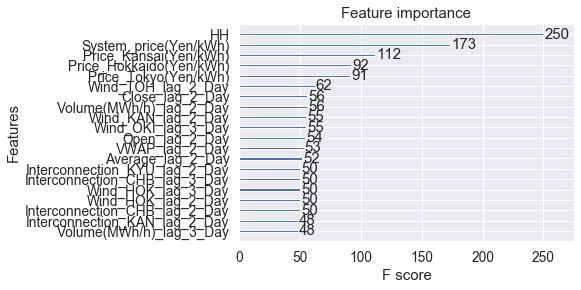

<Figure size 1000x500 with 0 Axes>

In [55]:
# Feature importance of the last train set
from xgboost import plot_importance

# plot feature importance
plot_importance(modelXGB, max_num_features = 20)
plt.figure(figsize=(10, 5),dpi=100)
plt.show()

### RandomForest ※ Skip for the same reason as polynomial model

In [56]:
from sklearn.ensemble import RandomForestRegressor

# training_accuracy = []
# valid_accuracy = []
# rmse = []
# mae = []
# prediction_RF = []

# for train_index, valid_index in zip(Rolling_forward_split_train, Rolling_forward_split_valid):
#     # Divide the train/valid set  into 10 folds and pick up it.
#     X_train, X_valid = X.iloc[:train_index], X.iloc[train_index: valid_index]
#     y_train, y_valid = y.iloc[:train_index], y.iloc[train_index: valid_index]

#     #Fit train set to the model
#     modelRF = RandomForestRegressor(n_jobs = -1).fit(X_train, y_train) 
#     # Generate prediction results
#     y_pred = modelRF.predict(X_valid)
#     true_values = y_valid.values
#     # Save prediction results
#     prediction_RF.append(y_pred)
#     # Save evaluation results for each 10 validation and get mean
#     training_accuracy.append(modelRF.score(X_train, y_train))     
#     valid_accuracy.append(modelRF.score(X_valid, y_valid))     
#     rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
#     mae.append(mean_absolute_error(true_values, y_pred))

# # print("Training_accuracy: {}".format(training_accuracy))
# print("Training_accuracy: {}".format(np.mean(training_accuracy)))
# # print("Valid_accuracy: {}".format(valid_accuracy))
# print("Valid_accuracy: {}".format(np.mean(valid_accuracy)))

# # print("RMSE: {}".format(rmse))
# print("RMSE: {}".format(np.mean(rmse)))
# # print("MAE: {}".format(mae))
# print("MAE: {}".format(np.mean(mae)))

# # Convert prediction results with valid data from 2D list to 1D list
# prediction_RF = list(itertools.chain.from_iterable(prediction_RF))
# # Prediction with train data
# y_pred_train = list(modelRF.predict(X_train)[:Min_valid_index])
# # Store the prediction into the "graph data" table
# graph_data_log["Close_pred_RF"] = pd.Series(y_pred_train + prediction_RF)
# # Store the result of evaluation into the "Eval_table"
# Eval_table_log["RF"] = pd.Series([np.mean(rmse), np.mean(mae)])

In [57]:
# Feature importance of the last train set
# # plot feature importance
# df_feature_importance = pd.DataFrame(modelRF.feature_importances_, index=feature_list, columns=['feature importance']).sort_values('feature importance', ascending=True)
# #df_feature_all = pd.DataFrame([tree.feature_importances_ for tree in reg.estimators_], columns=boston.feature_names)
# df_feature_importance_top10 = df_feature_importance.tail(10)
# df_feature_importance_top10.plot(kind='barh');

## Statistical model

(Reference) in Japanese <p>
- VAR(Intuitive): https://logics-of-blue.com/var%E3%83%A2%E3%83%87%E3%83%AB/
- VAR: https://analytics-note.xyz/time-series/statsmodels-var-fit/
- VAR(Theory and implementation): https://qiita.com/innovation1005/items/b5333a939c0341b46ba9
- ARIMAX(Equation): https://qiita.com/shu-yusa/items/1c6148e4e6e523d644ae

In [58]:
# Top 5 coefficient from Linear model
coef_abs_list = list(coef_abs[:5].index)
# Pick up  Date, Time , Close and cols that have high importance on the linear model
arima_cols = ["Date", "Time", "Close"]
arima_cols = arima_cols + coef_abs_list
arima_cols

['Date',
 'Time',
 'Close',
 'System_price(Yen/kWh)',
 'Price_Kansai(Yen/kWh)',
 'Price_Tokyo(Yen/kWh)',
 'Close_lag_2_Day',
 'Low_lag_2_Day']

In [59]:
# Data for statistical modeling
all_data_stats = all_data_log.copy()
all_data_stats = all_data_stats[arima_cols]
all_data_stats["DateTime"] = pd.to_datetime(all_data_stats["Date"].astype(str) + " " + all_data_stats["Time"].astype(str))
all_data_stats = all_data_stats.drop(["Date", "Time"], axis=1)
X_stats = all_data_stats.drop(['Close', "DateTime"], axis=1)
X_stats =  np.array(X_stats)
y_stats = all_data_stats[["Close"]]
y_stats =  np.array(y_stats)

In [60]:
# ADF test for logarithmic price
ctt = sm.tsa.adfuller(y_stats, regression="ctt")
round(ctt[1], 4)

0.0

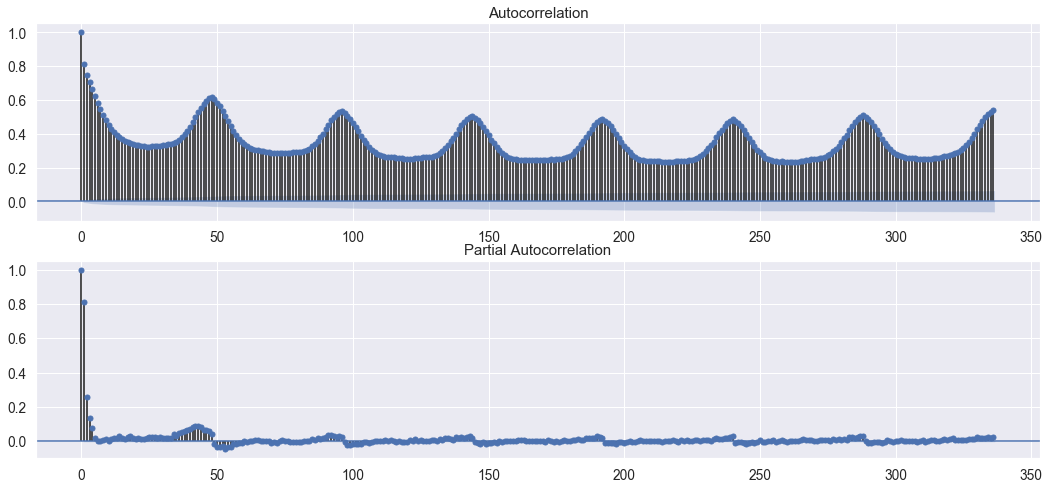

In [61]:
# Autocorrelation
fig = plt.figure(figsize=(18,8))
# Autocorrelation (1lag=30min --> 336 lags=1week)
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(y_stats, lags=336, ax=ax1)

# Partial Autocorrelation
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(y_stats, lags=336, ax=ax2)

### ARIMAX model

In [62]:
from statsmodels.tsa.arima.model import ARIMA

modelARIMA = ARIMA(y_stats, exog=X_stats).fit()

# Summary
print(modelARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                83237
Model:                          ARIMA   Log Likelihood              -71081.285
Date:                Wed, 31 Mar 2021   AIC                         142176.569
Time:                        00:47:10   BIC                         142241.875
Sample:                             0   HQIC                        142196.553
                              - 83237                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -4.68e-06      0.002     -0.002      0.998      -0.004       0.004
x1             0.3962      0.004     96.584      0.000       0.388       0.404
x2             0.2848      0.003     91.663      0.0

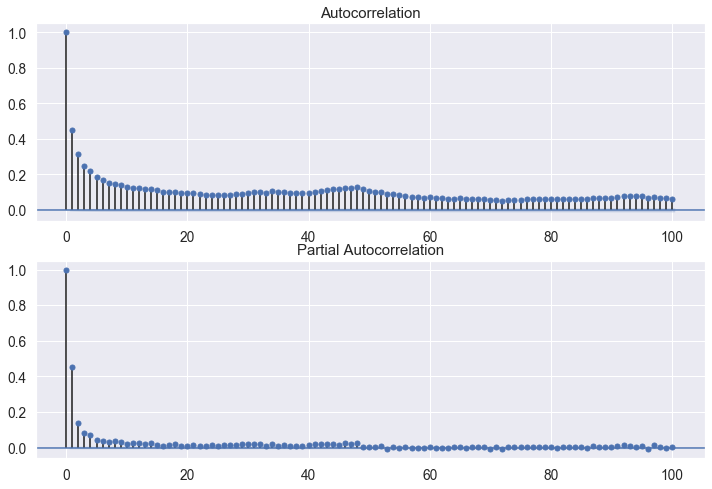

In [63]:
# Check the residual
resid = modelARIMA.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.squeeze(), lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=100, ax=ax2)

If residual still has seasonality or any kind of patterns, ARIMA model is not appropriately trained. <p>
-->It can be solved with incorporating explanatory variables into the model.

In [64]:
training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
prediction_ARIMA = []

# Set the parameter for .predict() which is for in-sample prediciton
train_end =  prediction_point.to_pydatetime() - datetime.timedelta(minutes=30)

for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    all_train, all_valid = all_data_stats.iloc[train_index], all_data_stats.iloc[valid_index]
    all_train, all_valid = all_train.set_index("DateTime"), all_valid.set_index("DateTime")
    # Pandas --> ndarray
    X_train = all_train.drop(['Close'], axis=1)
    X_train =  np.array(X_train)
    y_train = all_train[["Close"]]
    y_train =  np.array(y_train)
    X_valid = all_valid.drop(['Close'], axis=1)
    X_valid =  np.array(X_valid)
    y_valid = all_valid[["Close"]]
    y_valid =  np.array(y_valid) 

    #Fit train set to the model
    modelARIMA = ARIMA(y_train, exog=X_train
#                        order=(2, 0, 3),
                      ).fit() #上記セルのパラメータを参照
    # Generate prediction results
    y_pred = modelARIMA.forecast(steps=test_size, exog=X_valid) # test_size is set on "Preparation"
    true_values = y_valid
    # Save prediction results
    prediction_ARIMA.append(y_pred)
    # Save evaluation results for each 10 validation and get mean
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

# Convert prediction results with valid data from 2D list to 1D list
prediction_ARIMA = list(itertools.chain.from_iterable(prediction_ARIMA))
# Prediction with train data
y_pred_train = list(modelARIMA.predict())
y_pred_train = y_pred_train[:Min_valid_index]
# Store the prediction into the "graph data" table
graph_data_log = graph_data_log.reset_index()
graph_data_log["Close_pred_ARIMA"] = pd.Series(y_pred_train + prediction_ARIMA)
# Store the result of evaluation into the "Eval_table"
Eval_table_log["ARIMA"] = pd.Series([np.mean(rmse), np.mean(mae)])

RMSE: 0.5962731747402621
MAE: 0.41552557822596087


### SARIMAX model

In [65]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelSARIMA = SARIMAX(y_stats, exog=X_stats).fit()
print(modelSARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                83237
Model:               SARIMAX(1, 0, 0)   Log Likelihood              -61543.269
Date:                Wed, 31 Mar 2021   AIC                         123100.538
Time:                        00:57:39   BIC                         123165.844
Sample:                             0   HQIC                        123120.522
                              - 83237                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3965      0.005     80.617      0.000       0.387       0.406
x2             0.2691      0.004     68.877      0.000       0.261       0.277
x3             0.1397      0.003     40.523      0.0

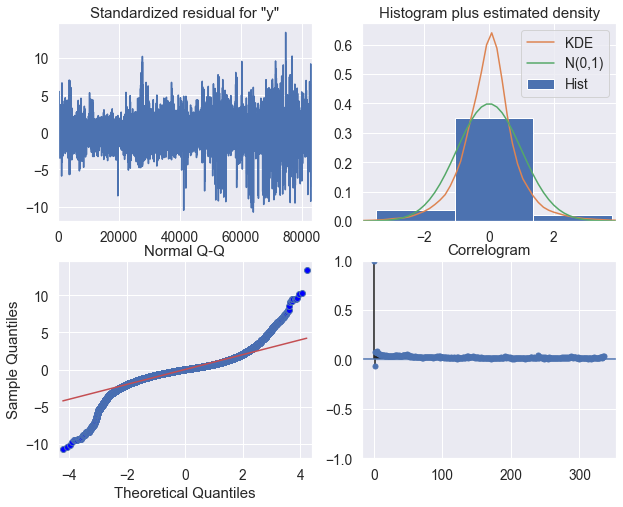

In [66]:
# Check residual (If periodicity can be seen, SARIMA model would be better)
# Plot/confirm residual (White noise)
modelSARIMA.plot_diagnostics(lags=336, figsize=[10, 8]);

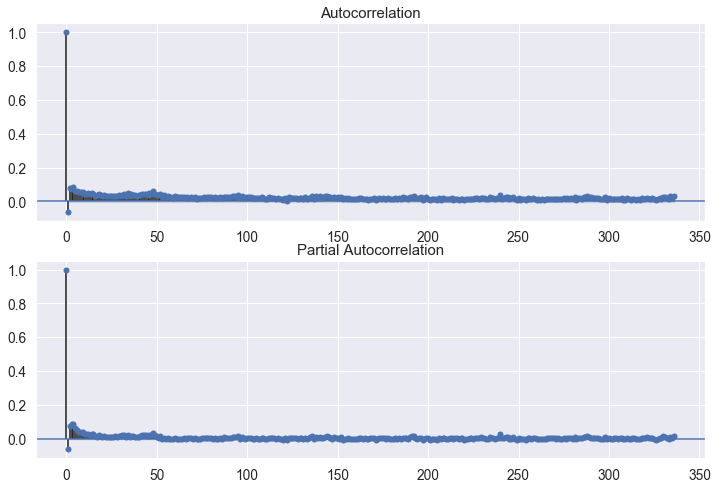

In [67]:
# Plot pertial Autocorrelation
resid = modelSARIMA.resid
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.squeeze(), lags=336, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=336, ax=ax2)

It seems SARIMA would be better than ARIMA model.

In [68]:
training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
prediction_SARIMA = []

# Set the parameter for .predict() which is for in-sample prediciton
train_end =  prediction_point.to_pydatetime() - datetime.timedelta(minutes=30)

for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    all_train, all_valid = all_data_stats.iloc[train_index], all_data_stats.iloc[valid_index]
    all_train, all_valid = all_train.set_index("DateTime"), all_valid.set_index("DateTime")
    # Pandas --> ndarray
    X_train = all_train.drop(['Close'], axis=1)
    X_train =  np.array(X_train)
    y_train = all_train[["Close"]]
    y_train =  np.array(y_train)
    X_valid = all_valid.drop(['Close'], axis=1)
    X_valid =  np.array(X_valid)
    y_valid = all_valid[["Close"]]
    y_valid =  np.array(y_valid) 
 
    #Fit train set to the model
    modelSARIMA = SARIMAX(y_train, 
#                        order=(2, 0, 3),
                      ).fit() #上記セルのパラメータを参照
    # Generate prediction results
    y_pred = modelSARIMA.forecast(steps=test_size, exog=X_valid) # test_size is set on "Preparation"
    true_values = y_valid
    # Save prediction results
    prediction_SARIMA.append(y_pred)
    # Save evaluation results for each 10 validation and get mean
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

# Convert prediction results with valid data from 2D list to 1D list
prediction_SARIMA = list(itertools.chain.from_iterable(prediction_SARIMA))
# Prediction with train data
y_pred_train = list(modelSARIMA.predict())
y_pred_train = y_pred_train[:Min_valid_index]
# Store the prediction into the "graph data" table
graph_data_log = graph_data_log.reset_index()
graph_data_log["Close_pred_SARIMA"] = pd.Series(y_pred_train + prediction_SARIMA)
# Store the result of evaluation into the "Eval_table"
Eval_table_log["SARIMA"] = pd.Series([np.mean(rmse), np.mean(mae)])

RMSE: 1.0435778265341165
MAE: 0.7790698929200144


## Others --> Facebook Prophet

(Reference)
- Document of Prophet from Facebook: https://peerj.com/preprints/3190/

- Tutorial for incorporating external explanatory variable: https://nbviewer.jupyter.org/github/nicolasfauchereau/Auckland_Cycling/blob/master/notebooks/Auckland_cycling_and_weather.ipynb

- Equation: https://devblog.thebase.in/entry/2019/12/20/110000_1

- Information in Japanese (Very detailed): https://mikiokubo.github.io/analytics/15forecast.html

In [69]:
# # Pick up  Date, Time , Close and cols that have high importance on the linear model
X_cols =  coef_abs_list

In [70]:
X_cols

['System_price(Yen/kWh)',
 'Price_Kansai(Yen/kWh)',
 'Price_Tokyo(Yen/kWh)',
 'Close_lag_2_Day',
 'Low_lag_2_Day']

In [71]:
all_data_prop = all_data_lagged[X_cols]
all_data_prop["Date"], all_data_prop["Time"], all_data_prop["Close"] = all_data_lagged["Date"], all_data_lagged["Time"], all_data_lagged["Close"]
all_data_prop["DateTime"] = pd.to_datetime(all_data_prop["Date"].astype(str) + " " + all_data_prop["Time"].astype(str))
all_data_prop = all_data_prop.drop(["Date", "Time"], axis=1)
all_data_prop.tail()

,System_price(Yen/kWh),Price_Kansai(Yen/kWh),Price_Tokyo(Yen/kWh),Close_lag_2_Day,Low_lag_2_Day,Close,DateTime
83232,35.0,50.0,35.0,14.90,14.90,70.00,2020-12-31 21:30:00
83233,45.0,50.0,40.0,9.90,9.90,45.48,2020-12-31 22:00:00
83234,40.0,40.0,40.0,29.82,14.90,41.33,2020-12-31 22:30:00
83235,35.0,35.0,35.0,4.05,4.05,36.66,2020-12-31 23:00:00
83236,25.0,25.0,25.0,4.18,4.18,26.46,2020-12-31 23:30:00


In [72]:
# Set ds and y for the model
all_data_prop = all_data_prop.rename(columns={'DateTime': 'ds', 'Close': 'y'})

In [73]:
all_data_prop.head()

,System_price(Yen/kWh),Price_Kansai(Yen/kWh),Price_Tokyo(Yen/kWh),Close_lag_2_Day,Low_lag_2_Day,y,ds
0,6.61,6.69,6.69,0.0,0.0,7.69,2016-04-01 00:00:00
1,6.34,6.34,6.34,0.0,0.0,7.45,2016-04-01 00:30:00
2,6.34,6.34,6.34,0.0,0.0,7.21,2016-04-01 01:00:00
3,6.25,6.03,6.03,0.0,0.0,7.06,2016-04-01 01:30:00
4,6.57,6.57,6.57,0.0,0.0,7.21,2016-04-01 02:00:00


In [74]:
# Divide dataset into train/valid set
all_data_prop_train = all_data_prop.iloc[all_data_prop.index[:len(X)-test_size]]
all_data_prop_valid = all_data_prop.iloc[all_data_prop.index[len(X)-test_size:]]

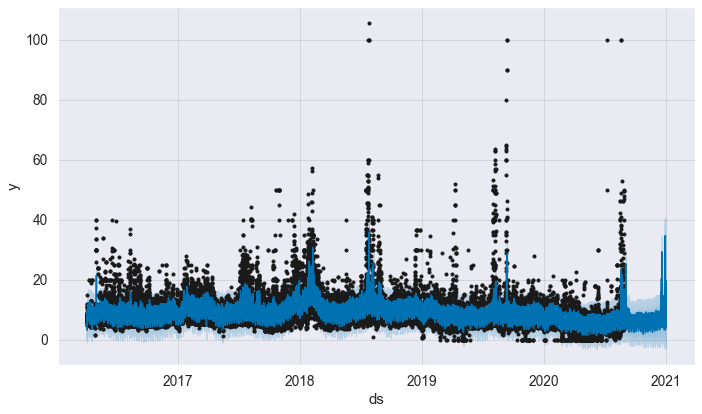

In [75]:
from fbprophet import Prophet
modelProp = Prophet()
# set exog for train data
for x in X_cols:
    modelProp = Prophet().add_regressor(x)

# fit train data
modelProp = modelProp.fit(all_data_prop_train)
# Make prediction datatable
future = modelProp.make_future_dataframe(periods=len(all_data_prop_valid), freq='30min')

# set exog for valid data
for x in X_cols:
    future[x] = all_data_prop[x]

# Plot
forecast = modelProp.predict(future)
modelProp.plot(forecast);

In [76]:
training_accuracy = []
valid_accuracy = []
rmse = []
mae = []
prediction_Prophet = []

# Set the parameter for .predict() which is for in-sample prediciton
train_end =  prediction_point.to_pydatetime() - datetime.timedelta(minutes=30)
    
for train_index, valid_index in tscv.split(X):
    # Divide the train/valid set  into 10 folds and pick up it.
    train_prop, valid_prop = all_data_prop.iloc[train_index], all_data_prop.iloc[valid_index]
#     y_train, y_valid = train_prop.set_index("ds"), valid_prop.set_index("ds")

    # Add exog for train data
    for x in X_cols:
        modelProphet = Prophet(yearly_seasonality=True).add_regressor(x)
    
    # fit train data
    modelProphet = modelProphet.fit(train_prop) 
    # Make prediction datatable (Need to adjust the parameter of period to match the number of rows)
    future = modelProphet.make_future_dataframe(periods=len(valid_prop), freq='30min')
    # Add exog for valid data
    for x in X_cols:
        # Add exog for valid data
        future[x] = all_data_prop[x]
    
    # Generate prediction results
#     future = future.fillna(0, inplace=True)
    forecast = modelProphet.predict(future)
    y_pred = forecast["yhat"][valid_index]
    true_values = valid_prop["y"]
    # Save prediction results
    prediction_Prophet.append(y_pred)
    # Save evaluation results for each 10 validation and get mean
    rmse.append(sqrt(mean_squared_error(true_values, y_pred)))       
    mae.append(mean_absolute_error(true_values, y_pred))

# print("RMSE: {}".format(rmse))
print("RMSE: {}".format(np.mean(rmse)))
# print("MAE: {}".format(mae))
print("MAE: {}".format(np.mean(mae)))

# Convert prediction results with valid data from 2D list to 1D list
prediction_Prophet = list(itertools.chain.from_iterable(prediction_Prophet))
# Prediction with train data
y_pred_train = list(forecast["yhat"][:Min_valid_index])
# Store the prediction into the "graph data" table
graph_data_original["Close_pred_Prophet"] = pd.Series(y_pred_train + prediction_Prophet)
# Store the result of evaluation into the "Eval_table"
Eval_table_original["Prophet"] = pd.Series([np.mean(rmse), np.mean(mae)])

RMSE: 4.769914222748598
MAE: 3.151088811930336


# Visualisation of the model performance 

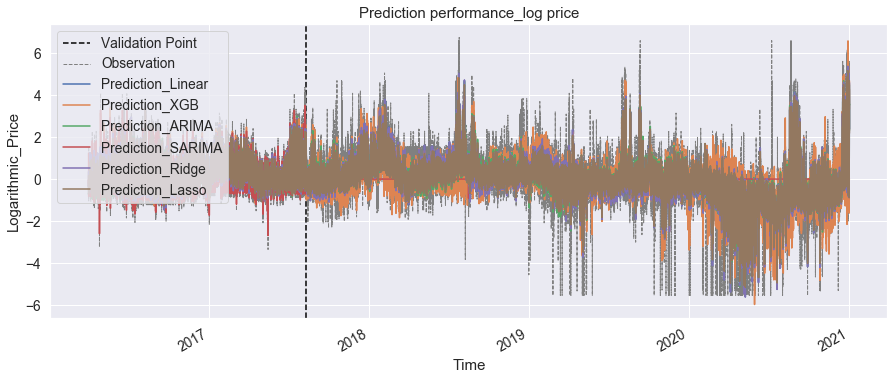

In [77]:
#対数化されたターゲットと予測値の比較

Models = [
    "Linear",
#    ,"PolyLinear",
        "XGB", "ARIMA", "SARIMA", "Ridge", "Lasso"
         ]

fig, ax = plt.subplots(1, figsize=(15, 6))
plt.title('Prediction performance_log price')

# Set index
graph_data_log = graph_data_log.set_index("DateTime")
start = "2016-04-01 00:00:00"
end = "2020-12-31 23:30:00"

# Vertical line (need to convert the date type from timestamp to datetime.datetime as x-axis)
plt.axvline(prediction_point.to_pydatetime(), label="Validation Point", linestyle="dashed", color="black")
# Add text for the vertical line
# plt.text(prediction_point.to_pydatetime(), -2, 'Prediction Point',rotation=0)

# Plot Close 
graph_data_log.Close[graph_data_log.index > start].plot(ax=ax, label="Observation", linestyle="dashed", color="gray", linewidth=1)

for model in Models:
    graph_data_log["Close_pred_" + model][graph_data_log.index > start].plot(ax=ax, label="Prediction_" + model)

# x-axis
plt.gcf().autofmt_xdate()
ax.set(xlabel="Time", ylabel="Logarithmic_Price")
plt.legend(loc="upper left");

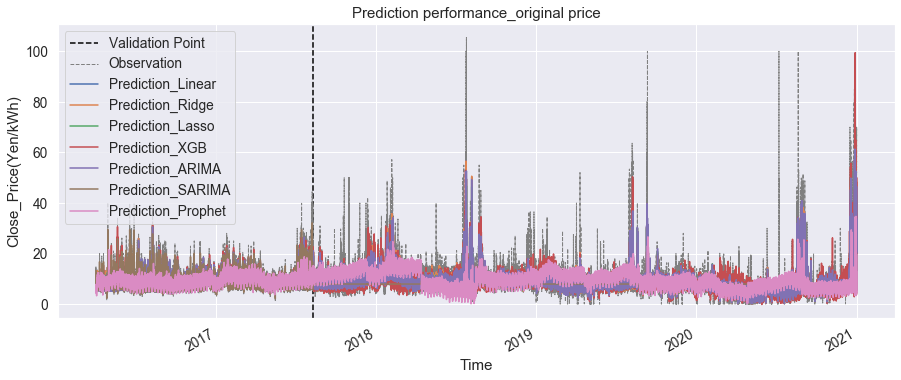

In [91]:
graph_data_original = graph_data_original.reset_index()

Models = [
            "Linear", "Ridge", "Lasso", "XGB"
#           , "PolyLinear",
    ,"ARIMA"
    ,"SARIMA"
]

for model in Models:
    # inverse for Prediction
    y_pred_original = inverse_trans_yeo_johnson(all_data_lagged["Close"].values.reshape(-1,1), graph_data_log["Close_pred_" + model].values.reshape(-1, 1))
    y_pred_original =  pd.DataFrame(y_pred_original)
    # Add the data on "graph_data"
    graph_data_original["Close_pred_" + model] = y_pred_original
    
    # Validation setに対してYen/kWhでの評価
    rmse = sqrt(mean_squared_error(graph_data_original.Close[Min_valid_index:], graph_data_original["Close_pred_" + model][Min_valid_index:]))
    mae = mean_absolute_error(graph_data_original.Close[Min_valid_index:], graph_data_original["Close_pred_" + model][Min_valid_index:])
    # Store the result of evaluation into the "Eval_table"
    Eval_table_original[model] = pd.Series([np.mean(rmse), np.mean(mae)])

graph_data_original = graph_data_original.set_index("DateTime")

# Plot the original close price and  predicted price
fig, ax = plt.subplots(1, figsize=(15, 6))
# Vertical line (need to convert the date type from timestamp to datetime.datetime as x-axis)
plt.axvline(prediction_point.to_pydatetime(), label="Validation Point", linestyle="dashed", color="black")
# Plot Close
graph_data_original.Close[graph_data_original.index > start].plot(ax=ax, label="Observation", linestyle="dashed", color="gray", linewidth=1)

# Plot the predicted price with each model
for model in Models:
    graph_data_original["Close_pred_" + model][graph_data_original.index > start].plot(ax=ax, label="Prediction_" + model)

# Plot Prophet
graph_data_original["Close_pred_Prophet"][graph_data_original.index > start].plot(ax=ax, label="Prediction_Prophet")
    
# x-axis
plt.title('Prediction performance_original price')
plt.gcf().autofmt_xdate()
ax.set(xlabel="Time", ylabel="Close_Price(Yen/kWh)")
plt.legend(loc="upper left");

In [80]:
# Evalation for the prediction of validation data based on log
Eval_table_log

,EvalFunc,Linear,Ridge,Lasso,XGB,ARIMA,SARIMA
0,RMSE_log,0.608042,0.607720,0.598954,0.732057,0.596273,1.043578
1,MAE_log,0.430938,0.430592,0.420225,0.537617,0.415526,0.779070


In [105]:
# Evalation for the prediction of validation data based on original
Eval_table_original = Eval_table_original[["EvalFunc", "Linear", "Ridge", "Lasso", "XGB", "ARIMA", "SARIMA", "Prophet"]]
Eval_table_original

,EvalFunc,Linear,Ridge,Lasso,XGB,ARIMA,SARIMA,Prophet
0,RMSE_Yen/kWh,2.907833,2.907096,2.938542,3.482836,2.898006,5.075197,4.769914
1,MAE_Yen/kWh,1.585864,1.584548,1.558018,1.949493,1.535714,2.855057,3.151089


The folloing information could be the benchmark for the prediction performance.

In [84]:
spot = all_data["System_price(Yen/kWh)"][Min_valid_index:]
close = all_data["Close"][Min_valid_index:]

print("RMSE_Spot/Close: {}".format(round(sqrt(mean_squared_error(close, spot)), 4)))
print("MAE_Spot/Close: {}".format(round(mean_absolute_error(close, spot), 4)))

RMSE_Spot/Close: 2.8517
MAE_Spot/Close: 1.4936


In [82]:
all_data["Close"][Min_valid_index:].describe()

count    59460.000000
mean         8.569872
std          5.037051
min          0.010000
25%          5.960000
50%          7.760000
75%          9.990000
max        105.500000
Name: Close, dtype: float64

Target
- Mean: 6.693
- Std; 5.888

# Making combined price data for the Phase 2

In [101]:
# Finalise dataset and make the csv data for trading phase

# Decide one model for trading
model = "ARIMA"

df_prediction = all_data[['Date', 'HH', 'Open', 'High', 'Low', 'Close', 'System_price(Yen/kWh)']]
df_prediction["DateTime"] = graph_data_original.reset_index()["DateTime"]
df_prediction = df_prediction.rename(columns={'System_price(Yen/kWh)': 'Spot'})

graph_data_original = graph_data_original.reset_index()
df_prediction['Close_pred'] = graph_data_original["Close_pred_" + model].round(2)
df_prediction = df_prediction[df_prediction.index >= Min_valid_index]

# CSV file
df_prediction.to_csv('/Users/kenotsu/Documents/master_thesis/Datasets/Master_thesis/df_prediction.csv', index=False)

In [102]:
df_prediction

,Date,HH,Open,High,Low,Close,Spot,DateTime,Close_pred
23777,2017-08-09,18,19.5,20.00,5.39,9.55,10.68,2017-08-09 08:30:00,10.19
23778,2017-08-09,19,20.0,20.00,9.32,9.32,14.75,2017-08-09 09:00:00,14.02
23779,2017-08-09,20,25.0,25.50,10.78,13.01,16.00,2017-08-09 09:30:00,16.05
23780,2017-08-09,21,28.5,29.00,13.00,20.34,19.90,2017-08-09 10:00:00,17.08
23781,2017-08-09,22,30.0,31.99,13.00,13.50,20.00,2017-08-09 10:30:00,19.19
...,...,...,...,...,...,...,...,...,...
83232,2020-12-31,44,35.0,70.00,33.00,70.00,35.00,2020-12-31 21:30:00,32.30
83233,2020-12-31,45,42.0,70.00,41.01,45.48,45.00,2020-12-31 22:00:00,35.72
83234,2020-12-31,46,42.0,70.00,35.00,41.33,40.00,2020-12-31 22:30:00,33.04
83235,2020-12-31,47,37.0,70.00,33.93,36.66,35.00,2020-12-31 23:00:00,27.00
